<a href="https://colab.research.google.com/github/JONAHKYAGABA/MLTOXICASSIGNMENT/blob/main/TOXIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install ucimlrepo

In [23]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
toxicity = fetch_ucirepo(id=728)

# data (as pandas dataframes)
X = toxicity.data.features
y = toxicity.data.targets

# metadata
print(toxicity.metadata)

# variable information
print(toxicity.variables)


{'uci_id': 728, 'name': 'Toxicity', 'repository_url': 'https://archive.ics.uci.edu/dataset/728/toxicity-2', 'data_url': 'https://archive.ics.uci.edu/static/public/728/data.csv', 'abstract': 'The dataset includes 171 molecules designed for functional domains of a core clock protein, CRY1, responsible for generating circadian rhythm. 56 of the molecules are toxic and the rest are non-toxic.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 171, 'num_features': 1203, 'feature_types': [], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2021, 'last_updated': 'Thu May 05 2022', 'dataset_doi': '10.24432/C59313', 'creators': ['Şeref Gül', 'FATIH RAHIM'], 'intro_paper': {'title': 'Structure-based design and classifications of small molecules regulating the circadian rhythm period', 'authors': 'Seref Gul, F. Rahim, Safak Isin, Fatma Yilmaz, Nuri 

In [24]:
print(X.columns)

Index(['MATS3v', 'nHBint10', 'MATS3s', 'MATS3p', 'nHBDon_Lipinski',
       'minHBint8', 'MATS3e', 'MATS3c', 'minHBint2', 'MATS3m',
       ...
       'WTPT-3', 'WTPT-4', 'WTPT-5', 'ETA_EtaP_L', 'ETA_EtaP_F', 'ETA_EtaP_B',
       'nT5Ring', 'SHdNH', 'ETA_dEpsilon_C', 'MDEO-22'],
      dtype='object', length=1203)


In [25]:
print(toxicity.data.targets )

        Class
0    NonToxic
1    NonToxic
2    NonToxic
3    NonToxic
4    NonToxic
..        ...
166  NonToxic
167  NonToxic
168  NonToxic
169     Toxic
170     Toxic

[171 rows x 1 columns]


In [26]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
toxicity = fetch_ucirepo(id=728)

# Data (as pandas DataFrames)
X = toxicity.data.features
y = toxicity.data.targets

# Combine features and target into a single DataFrame
toxicity_df = pd.concat([X, y], axis=1)
# Export the dataset to a CSV file
csv_filename = 'toxicity_dataset.csv'
toxicity_df.to_csv(csv_filename, index=False)

In [3]:
import pandas as pd

# Load the uploaded dataset
file_path = 'toxicity_dataset.csv'
data = pd.read_csv(file_path)

# Display basic info and the first few rows of the dataset for initial exploration
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.6+ MB


(None,
    MATS3v  nHBint10  MATS3s  MATS3p  nHBDon_Lipinski  minHBint8  MATS3e  \
 0  0.0908         0  0.0075  0.0173                0        0.0 -0.0436   
 1  0.0213         0  0.1144 -0.0410                0        0.0  0.1231   
 2  0.0018         0 -0.0156 -0.0765                2        0.0 -0.1138   
 3 -0.0251         0 -0.0064 -0.0894                3        0.0 -0.0747   
 4  0.0135         0  0.0424 -0.0353                0        0.0 -0.0638   
 
    MATS3c  minHBint2  MATS3m  ...   WTPT-4   WTPT-5  ETA_EtaP_L  ETA_EtaP_F  \
 0  0.0409        0.0  0.1368  ...   0.0000   0.0000      0.1780      1.5488   
 1 -0.0316        0.0  0.1318  ...   8.8660  19.3525      0.1739      1.3718   
 2 -0.1791        0.0  0.0615  ...   5.2267  27.8796      0.1688      1.4395   
 3 -0.1151        0.0  0.0361  ...   7.7896  24.7336      0.1702      1.4654   
 4  0.0307        0.0  0.0306  ...  12.3240  19.7486      0.1789      1.4495   
 
    ETA_EtaP_B  nT5Ring  SHdNH  ETA_dEpsilon_C  MDEO-

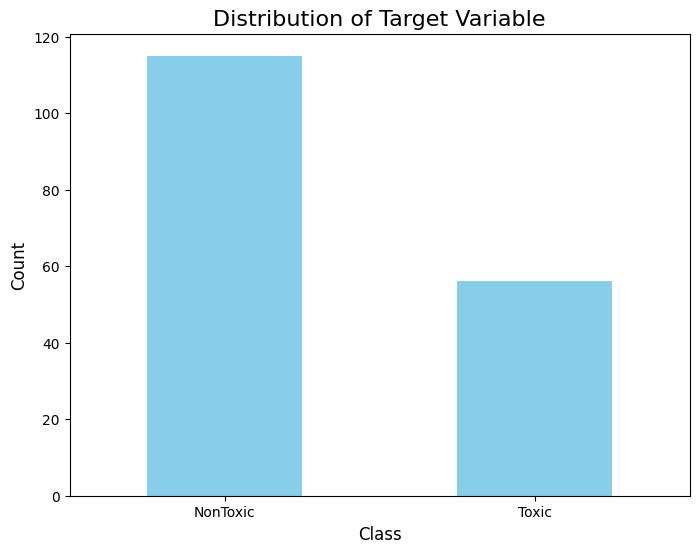

In [5]:
# Plot the distribution of the 'Class' variable
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_distribution = data['Class'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [18]:
# Ensure that only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation between features and the target ('Class_numeric')
correlation_with_target = numeric_data.corr()['Class_numeric'].sort_values(ascending=False)

# Convert the correlations to a DataFrame for a tabular format
correlation_table = pd.DataFrame(correlation_with_target).reset_index()
correlation_table.columns = ['Feature', 'Correlation with Class_numeric']

# Display the table
correlation_table


,Feature,Correlation with Class_numeric
0,Class_numeric,1.000000
1,EE_Dt,0.214785
2,C2SP2,0.189377
3,AATSC7p,0.165491
4,SpDiam_Dt,0.165033
...,...,...
1199,AATS1i,-0.139443
1200,GATS1i,-0.142659
1201,minHBint4,-0.147276
1202,GATS7v,-0.156486


from matplotlib import pyplot as plt
correlation_table['Correlation with Class_numeric'].plot(kind='hist', bins=20, title='Correlation with Class_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_table['Correlation with Class_numeric'].plot(kind='line', figsize=(8, 4), title='Correlation with Class_numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
correlation_table['Correlation with Class_numeric'].plot(kind='hist', bins=20, title='Correlation with Class_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=correlation_table)

https://docs.google.com/spreadsheets/d/1tSh2OlNH0ux_L3SrT0_sXujToDIBlhPV9IAZVuRBJik#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


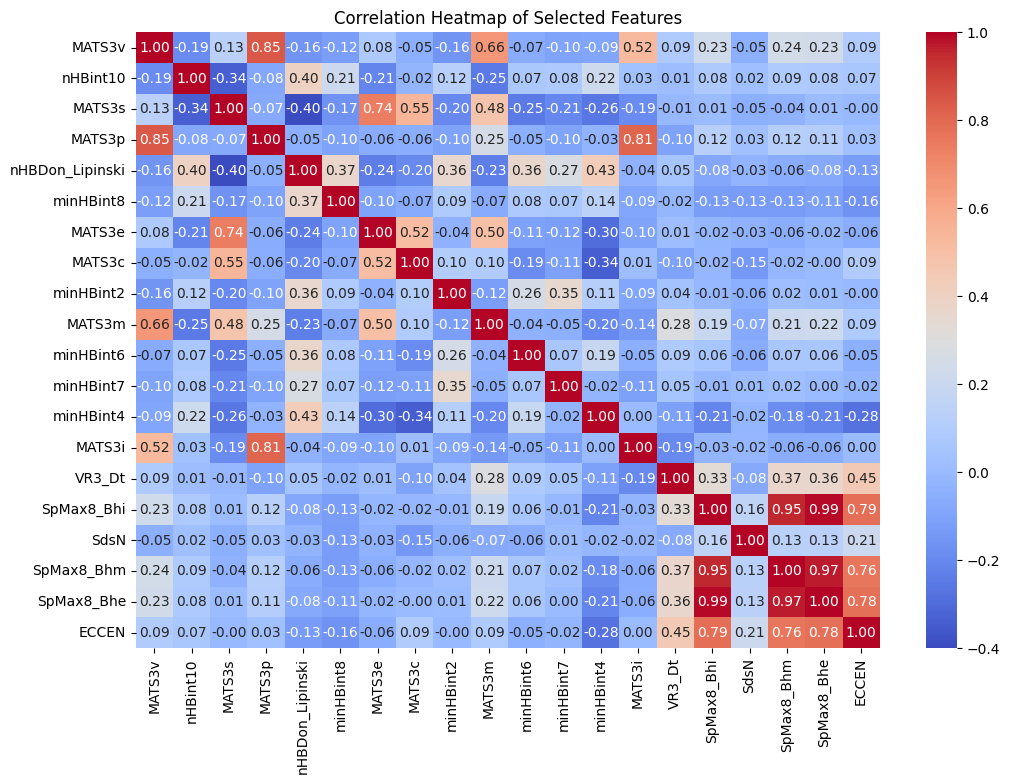

In [28]:
import  seaborn as sns
# Select a subset of columns (first 20 numerical features) for visualization
feature_columns = toxicity_df.columns[:20]

# Compute the correlation matrix for the selected features
correlation_matrix = toxicity_df[feature_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()


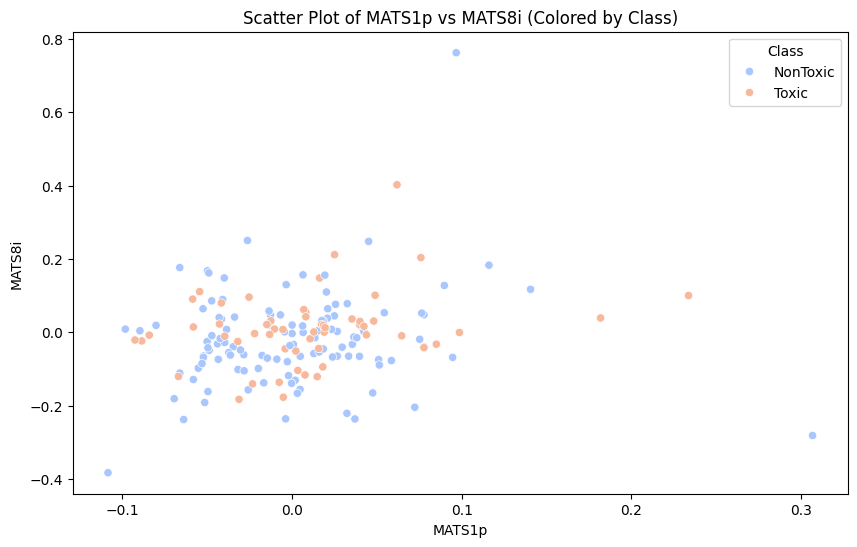

In [32]:
# Let's visualize the relationship between the top 2 most important features and the 'Class'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=toxicity_df['MATS1p'], y=toxicity_df['MATS8i'], hue=toxicity_df['Class'], palette='coolwarm')
plt.title("Scatter Plot of MATS1p vs MATS8i (Colored by Class)")
plt.xlabel("MATS1p")
plt.ylabel("MATS8i")
plt.show()

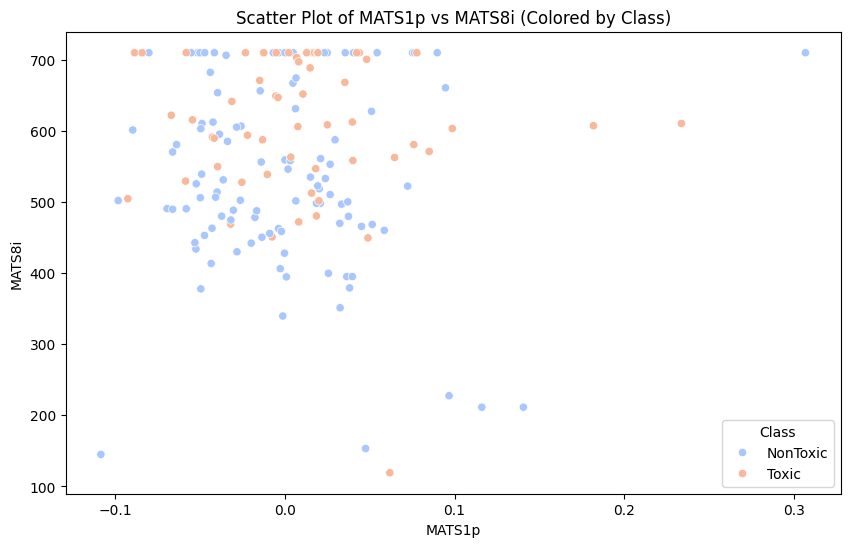

In [30]:
# Let's visualize the relationship between the top 2 most important features and the 'Class'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=toxicity_df['MATS1p'], y=toxicity_df['EE_Dt'], hue=toxicity_df['Class'], palette='coolwarm')
plt.title("Scatter Plot of MATS1p vs MATS8i (Colored by Class)")
plt.xlabel("MATS1p")
plt.ylabel("MATS8i")
plt.show()

{'uci_id': 728, 'name': 'Toxicity', 'repository_url': 'https://archive.ics.uci.edu/dataset/728/toxicity-2', 'data_url': 'https://archive.ics.uci.edu/static/public/728/data.csv', 'abstract': 'The dataset includes 171 molecules designed for functional domains of a core clock protein, CRY1, responsible for generating circadian rhythm. 56 of the molecules are toxic and the rest are non-toxic.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 171, 'num_features': 1203, 'feature_types': [], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2021, 'last_updated': 'Thu May 05 2022', 'dataset_doi': '10.24432/C59313', 'creators': ['Şeref Gül', 'FATIH RAHIM'], 'intro_paper': {'title': 'Structure-based design and classifications of small molecules regulating the circadian rhythm period', 'authors': 'Seref Gul, F. Rahim, Safak Isin, Fatma Yilmaz, Nuri 

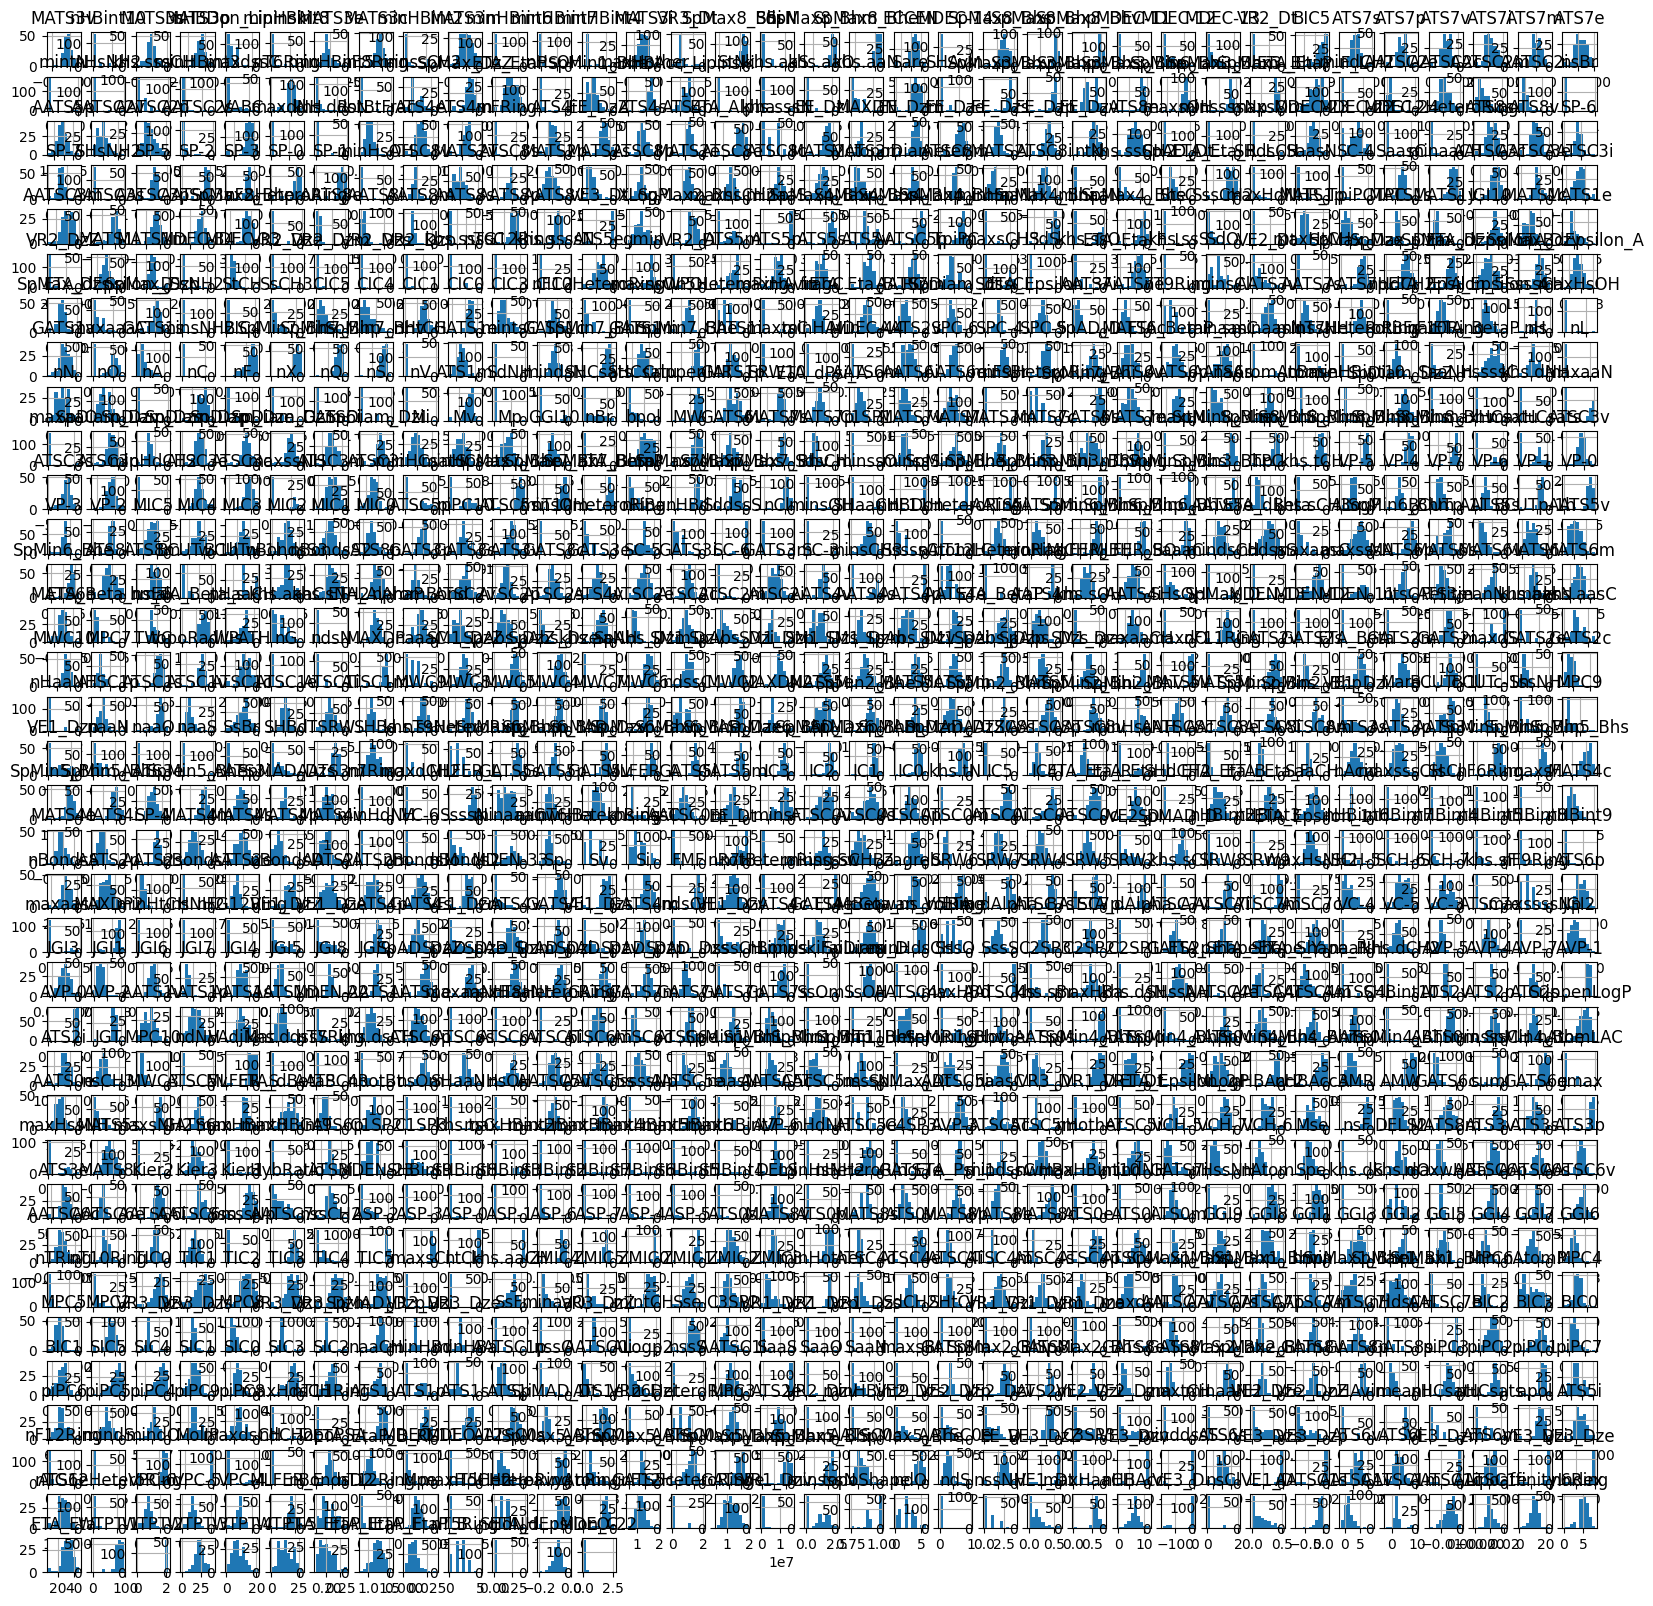

ValueError: could not convert string to float: 'NonToxic'

<Figure size 1500x1000 with 0 Axes>

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
toxicity = fetch_ucirepo(id=728)

# Data (as pandas DataFrames)
X = toxicity.data.features
y = toxicity.data.targets

# Combine features and target into a single DataFrame
toxicity_df = pd.concat([X, y], axis=1)

# Inspect metadata
print(toxicity.metadata)

# Inspect variable information
print(toxicity.variables)

# Data Overview
print(toxicity_df.info())
print(toxicity_df.describe())

# Visualize Distribution of Features
toxicity_df.hist(figsize=(20, 20))
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(toxicity_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairwise Plot of Important Features
sns.pairplot(toxicity_df, hue='Class')
plt.show()
